In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("FrozenLake-v1",desc= None,map_name = "8x8",is_slippery = False)
env.reset()
env.render()
#  S -> Start 
#  F -> Frozen Region
#  H -> Hole
#  G -> Goal

# Game starts at S and stops at H or G. And target is to reach G . 
# The reward system is F -> -0.01 , H -> -0.2 , G - > 1.0 
 


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [3]:
State_space = env.observation_space
print(State_space)

Discrete(64)


In [4]:
Action_space = env.action_space

# 0 -> Left
# 1 -> Down
# 2 -> Right
# 3 -> UP
print(Action_space)

Discrete(4)


In [5]:
def beh_policy(env,state,Q_table,ϵ):
    if np.random.uniform() -ϵ < 1e-6: # explores with epsilon prob 
        return env.action_space.sample()
    else :
        return np.argmax(Q_table[state]) # exploits with 1 - epsilon prob

In [41]:
def Q_learning (env,η,γ,ϵ,ϵ_min,total_eps):     
 
 State_space = env.observation_space

 Action_space = env.action_space

 # Q - Learning Training Phase

 # Initialise the Q table

 
 Q = np.zeros((State_space.n,Action_space.n))

 episode_list = []

 time_steps_list = []

 reward_list = []
 
 avg_rew_list = []
 
 avg_time_step = []

 for episode in range(1,total_eps+1):
    
    curr_state = env.reset() # resets to start position.
    
  
    success = False
    total_reward = 0
    time_steps = 0
    while time_steps >= 0 :
     
     time_steps  += 1
     
     action = beh_policy(env,curr_state,Q,ϵ) # Action is picked using ϵ - greedy policy.
    
     new_state,reward,success,info = env.step(action) # Action is performed
     
     total_reward += reward
     
     if reward == -0.01 : 
       
      old_value = Q[curr_state,action]    
     
      Q[curr_state,action] = old_value + η*(reward + γ*(np.max(Q[new_state])) - old_value) # Q value update step
      
      curr_state = new_state
     
     else :
      
      Q[curr_state,action] = reward # If reaches terminal state.
      
      break       
         
    reward_list.append(total_reward)
    
    if reward == 1.0 :
        episode_list.append(episode)
        time_steps_list.append(time_steps)
    
    if episode % (total_eps/50) == 0 :    
        avg_rew_list.append(np.mean(reward_list))
        avg_time_step.append(np.mean(time_steps_list))
        time_steps_list = []
        reward_list = []
    
    ϵ -= (ϵ - ϵ_min)*(episode)/total_eps # ϵ decays to ϵ_min as the agent trained.
    
 
 π = [np.argmax(Q[state]) for state in range(State_space.n)] # The policy designed by Q learning.

 
 return π,episode_list,avg_time_step,avg_rew_list 

In [7]:
total_eps = 5000 # Total no. of episodes to be trained

η = 0.3 # Learning rate.

γ = 0.8 # Discount factor

ϵ = 0.9 # Prob to explore
ϵ_min = 0.1 # minimum epsilon as it decays.

π_Q,epi_list_Q,avg_time_step_Q,avg_rew_Q = Q_learning(env,η,γ,ϵ,ϵ_min,total_eps)

In [8]:
print("Optimal Policy generated by Q learning :",π_Q)

Optimal Policy generated by Q learning : [1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 0, 2, 1, 3, 3, 3, 0, 2, 2, 2, 1, 0, 0, 0, 2, 3, 3, 0, 1, 3, 0, 2, 0, 0, 3, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0]


In [9]:
print("Total no.of times agent reached the Goal in Training Phase {}".format(len(epi_list_Q)))

Total no.of times agent reached the Goal in Training Phase 3932


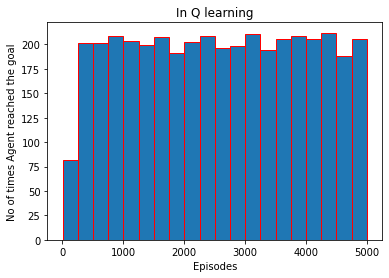

In [10]:
plt.hist(epi_list_Q,bins = 20,range = (1,total_eps),edgecolor = 'red')
plt.xlabel("Episodes")
plt.ylabel("No of times Agent reached the goal")
plt.title("In Q learning")
plt.savefig("Figs/hist_Q.png")
plt.show()

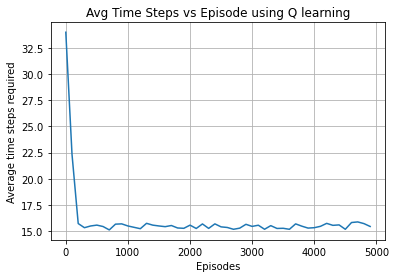

In [11]:
plt.grid()
plt.plot(np.arange(1,total_eps,total_eps/50),avg_time_step_Q)
plt.xlabel("Episodes")
plt.ylabel("Average time steps required")
plt.title("Avg Time Steps vs Episode using Q learning")
plt.savefig("Figs/Avg_time_Q.png")
plt.show()

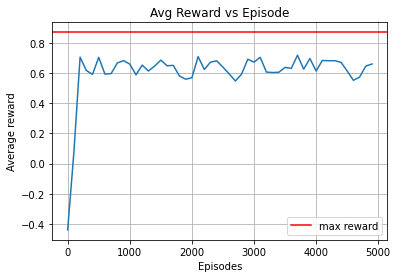

In [12]:
plt.grid()
plt.plot(np.arange(1,total_eps,total_eps/50),avg_rew_Q)
plt.axhline(y = 0.87,color = 'r',label = "max reward")# Maximum reward possible
plt.xlabel("Episodes")
plt.ylabel("Average reward")
plt.title("Avg Reward vs Episode")
plt.legend()

plt.savefig("Figs/Avg_rew_Q.png")
plt.show()

In [13]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.2)

In [42]:
# Visualising the agent game play using the policy designed by Q learning 

curr_state = env.reset()
time_step = 0
frames_Q = []
reward = -0.01

while reward ==-0.01:
    time_step+=1
    
    action = π_Q[curr_state]
    
    new_state,reward,success,info = env.step(int(action))
    
    curr_state = new_state
        
    
    frames_Q.append({
        'frame': env.render(mode='ansi'),
        'state': new_state,
        'action': action,
        'reward': reward
        }
    )

print_frames(frames_Q)

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

Timestep: 14
State: 63
Action: 1
Reward: 1.0


In [15]:
# SARSA Algorithm Starts Here.

In [16]:

def SARSA (env,η,γ,ϵ,ϵ_min,total_eps):

#  Initialise the Q table 
 
 Q =  np.zeros((int(State_space.n),int(Action_space.n)))

 episode_list = []

 time_steps_list = []

 reward_list = []
    
 avg_rew_list = []

 avg_time_step = []

 for episode in range(1,total_eps+1):
    
    curr_state = env.reset() # resets to start position.
    
  
    success = False
    
    time_steps = 0
    total_reward = 0
    action = beh_policy(env,curr_state,Q,ϵ)
    while time_steps >= 0 :
     
     time_steps  += 1
         
     new_state,reward,success,info = env.step(action)
     
     total_reward +=reward
     
     if reward == -0.01 : 
       
      old_value = Q[curr_state,action]
        
      
      new_action = beh_policy(env,new_state,Q,ϵ)
    
      Q[curr_state,action] = old_value + η*(reward + γ*(Q[new_state,new_action]) - old_value) # Q value update step
      
      curr_state = new_state
      
      action = new_action
     
     else :
   
      Q[curr_state,action] = reward # If reaches terminal state      
      break       
        
    reward_list.append(total_reward)
    
    if reward == 1 :
        episode_list.append(episode)
        time_steps_list.append(time_steps)
        
    if episode % (total_eps/50) == 0 :    
        avg_rew_list.append(np.mean(reward_list))
        avg_time_step.append(np.mean(time_steps_list))
        time_steps_list = []
        reward_list = []   
    
    
    ϵ -= (ϵ - ϵ_min)*(episode)/total_eps
    
 
 π = [np.argmax(Q[state]) for state in range(State_space.n)] 
    
 
 return π,episode_list,avg_time_step,avg_rew_list

In [17]:
total_eps = 5000 # Total no. of episodes to be trained

η = 0.3 # Learning rate.

γ = 0.8 # Discount factor

ϵ = 0.9 # Prob to explore
ϵ_min = 0.1 # minimum epsilon as it decays.


π_sarsa,epi_list_sarsa,avg_time_step_sarsa,avg_rew_sarsa = SARSA(env,η,γ,ϵ,ϵ_min,total_eps)

In [18]:
print("Optimal Policy generated by SARSA Algo :",π_sarsa)

Optimal Policy generated by SARSA Algo : [2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 3, 0, 3, 0, 2, 2, 2, 1, 3, 0, 0, 0, 1, 0, 2, 1, 3, 0, 0, 0, 2, 2, 2, 1, 3, 0, 0, 1, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]


In [19]:
print("No.of times agent reached the goal in training phase:",len(epi_list_sarsa))

No.of times agent reached the goal in training phase: 4592


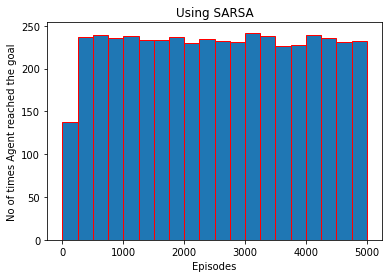

In [20]:

plt.hist(epi_list_sarsa,bins = 20,range = (1,total_eps),edgecolor = 'red')
plt.xlabel("Episodes")
plt.ylabel("No of times Agent reached the goal")
plt.title("Using SARSA")
plt.savefig("Figs/hist_sarsa.png")
plt.show()

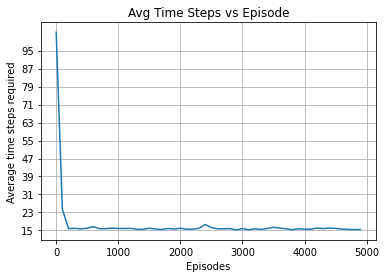

In [21]:

min_avg_time = np.min(avg_time_step_sarsa)

max_avg_time = np.max(avg_time_step_sarsa)

step = (max_avg_time - min_avg_time)//10 # Step size 

plt.grid()
plt.plot(np.arange(1,total_eps,total_eps/50),avg_time_step_sarsa)
plt.xlabel("Episodes")
plt.ylabel("Average time steps required")
plt.title("Avg Time Steps vs Episode")
plt.yticks(np.round(np.arange(min_avg_time,max_avg_time,step)))

plt.savefig("Figs/Avg_time_sarsa.png")
plt.show()


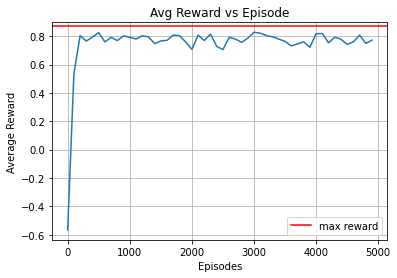

In [22]:

plt.grid()
plt.plot(np.arange(1,total_eps,100),avg_rew_sarsa)
plt.axhline(y = 0.87,color = 'r',label = "max reward")# Maximum reward possible
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("Avg Reward vs Episode")
plt.legend()

plt.savefig("Figs/Avg_rew_sarsa.png")
plt.show()

In [43]:
curr_state = env.reset()
time_step = 0
frames_sarsa = []
reward = -0.01
while reward == -0.01 and time_step < 100 :
    time_step+=1
    
    action = π_sarsa[curr_state]
    
    new_state,reward,success,info = env.step(int(action))
    
    curr_state = new_state
    
    frames_sarsa.append({
        'frame': env.render(mode='ansi'),
        'state': new_state,
        'action': action,
        'reward': reward
        }
    )
print_frames(frames_sarsa)    

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG

Timestep: 14
State: 63
Action: 1
Reward: 1.0


In [24]:
# Q learning vs SARSA in terms of path taken.

In [25]:
# Custom Env
env_cus = ["SFFFFFFF",
           "FFHHHHHF",
           "FFHFHFHF",
           "FFFHFFHF",
           "FFHFHFHF",
           "FFHFFHHF",
           "FHFFFFHF",
           "FFFHFFFG"]
env2 = gym.make("FrozenLake-v1",desc = env_cus,is_slippery = False)
env2.reset()
env2.render()


SFFFFFFF
FFHHHHHF
FFHFHFHF
FFFHFFHF
FFHFHFHF
FFHFFHHF
FHFFFFHF
FFFHFFFG


In [26]:
# Q learning Algo

# total_eps = 5000 

# η = 0.3

# γ = 0.8

# ϵ = 0.9 
# ϵ_min = 0.1 

π_Q2,epi_list_Q2,avg_time_step_Q2,avg_rew_Q2 = Q_learning(env2,η,γ,ϵ,ϵ_min,total_eps)


/home/charanubuntu/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/charanubuntu/.local/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [27]:
# SARSA-1 and SARSA-2 are SARSA algos with changes mentioned in the cells.

In [28]:
# SARSA Algo -1 
total_eps_2 = 35000 # Increased the total_eps

π_sarsa1,epi_list_sarsa1,avg_time_step_sarsa1,avg_rew_sarsa1 = SARSA(env2,η,γ,ϵ,ϵ_min,total_eps_2)


In [29]:
# SARSA Algo -2 with changing ϵ value.
ϵ = ϵ_min # Constant ϵ value throughout training with 0.1.
π_sarsa2,epi_list_sarsa2,avg_time_step_sarsa2,avg_rew_sarsa2 = SARSA(env2,η,γ,ϵ,ϵ_min,total_eps)


In [30]:
print("The policy generated by Q learning :",π_Q2)
print("The policy generated by SARSA-1 :",π_sarsa1)
print("The policy generated by SARSA-2 :",π_sarsa2)

The policy generated by Q learning : [2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 0, 0, 0, 0, 0, 1, 2, 3, 0, 0, 0, 0, 0, 1, 3, 3, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 1, 2, 2, 3, 0, 2, 2, 2, 0]
The policy generated by SARSA-1 : [1, 0, 0, 3, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 1, 2, 2, 3, 0, 2, 2, 2, 0]
The policy generated by SARSA-2 : [1, 0, 0, 0, 0, 3, 2, 2, 1, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 3, 0, 1, 0, 0, 0, 1, 1, 3, 0, 1, 1, 0, 0, 0, 1, 0, 2, 2, 1, 1, 0, 0, 2, 2, 3, 0, 2, 2, 2, 0]


In [31]:
print("Success percentage of Q learning:",100*(len(epi_list_Q2)/total_eps))
print("Success percentage of SARSA-1:",100 *(len(epi_list_sarsa1)/total_eps_2))
print("Success percentage of SARSA-2:",100 *(len(epi_list_sarsa2)/total_eps))

Success percentage of Q learning: 71.76
Success percentage of SARSA-1: 64.48857142857143
Success percentage of SARSA-2: 71.88


In [32]:
# Plots to interpret the performance of agent in various cases.

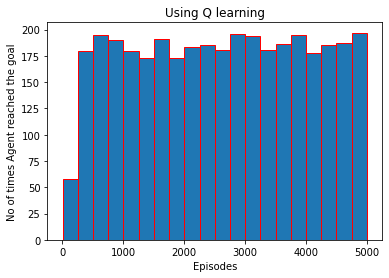

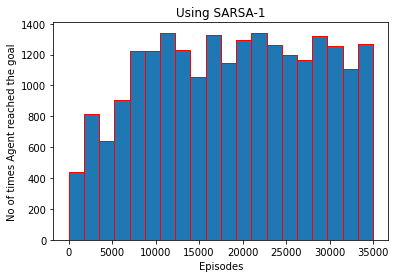

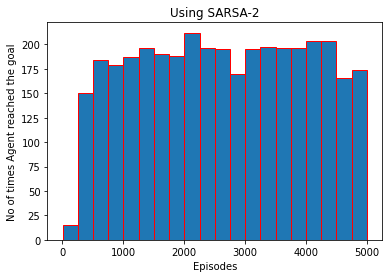

In [33]:
# Code for Q learning 

plt.figure(1)
plt.hist(epi_list_Q2,bins = 20,range = (1,total_eps),edgecolor = 'red')
plt.xlabel("Episodes")
plt.ylabel("No of times Agent reached the goal")
plt.title("Using Q learning")
plt.savefig("Figs/hist2_Q.png")

# Code for SARSA-1

plt.figure(2)
plt.hist(epi_list_sarsa1,bins = 20,range = (1,total_eps_2),edgecolor = 'red')
plt.xlabel("Episodes")
plt.ylabel("No of times Agent reached the goal")
plt.title("Using SARSA-1")
plt.savefig("Figs/hist2_sarsa1.png")

# Code for SARSA-2

plt.figure(3)
plt.hist(epi_list_sarsa2,bins = 20,range = (1,total_eps),edgecolor = 'red')
plt.xlabel("Episodes")
plt.ylabel("No of times Agent reached the goal")
plt.title("Using SARSA-2")
plt.savefig("Figs/hist2_sarsa2.png")
plt.show()

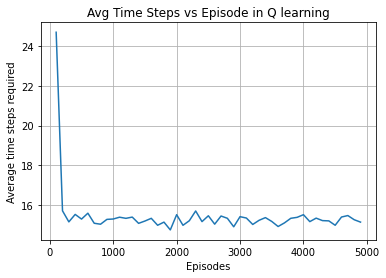

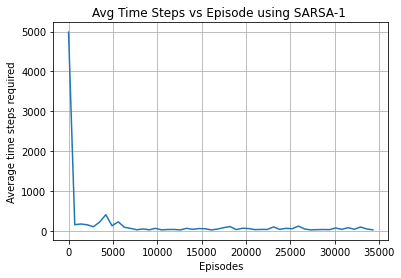

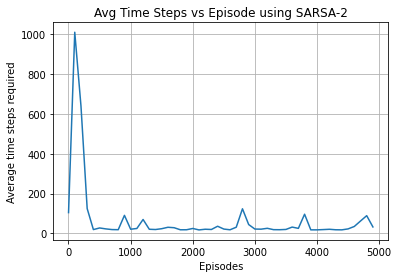

In [34]:
# Code for Q learning
plt.figure(1)
plt.grid()
plt.plot(np.arange(1,total_eps,total_eps/50),avg_time_step_Q2)
plt.xlabel("Episodes")
plt.ylabel("Average time steps required")
plt.title("Avg Time Steps vs Episode in Q learning")
plt.savefig("Figs/Avg_time2_Q.png")

# Code for SARSA -1
plt.figure(2)
plt.grid()
plt.plot(np.arange(1,total_eps_2,total_eps_2/50),avg_time_step_sarsa1)
plt.xlabel("Episodes")
plt.ylabel("Average time steps required")
plt.title("Avg Time Steps vs Episode using SARSA-1 ")
plt.savefig("Figs/Avg_time2_sarsa1.png")

# Code for SARSA-2
plt.figure(3)
plt.grid()
plt.plot(np.arange(1,total_eps,total_eps/50),avg_time_step_sarsa2)
plt.xlabel("Episodes")
plt.ylabel("Average time steps required")
plt.title("Avg Time Steps vs Episode using SARSA-2")
plt.savefig("Figs/Avg_time2_sarsa2.png")
plt.show()

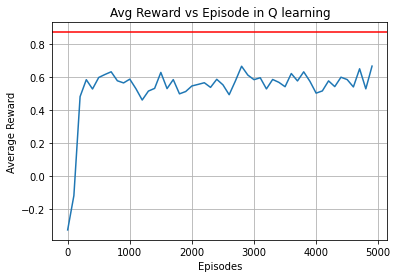

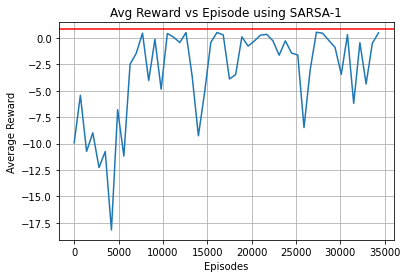

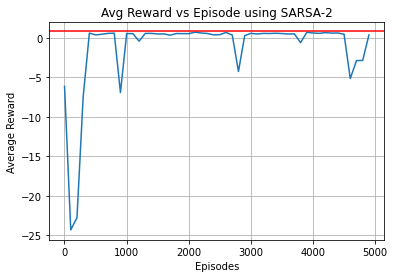

In [35]:
# Code for Q learning
plt.figure(1)
plt.grid()
plt.plot(np.arange(1,total_eps+1,total_eps/50),avg_rew_Q2)
plt.axhline(y = 0.87,color = 'r',label = "max reward")
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("Avg Reward vs Episode in Q learning")
plt.savefig("Figs/Avg_rew2_Q.png")

# Code for SARSA-1
plt.figure(2)
plt.grid()
plt.plot(np.arange(1,total_eps_2+1,total_eps_2/50),avg_rew_sarsa1)
plt.axhline(y = 0.87,color = 'r',label = "max reward")
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("Avg Reward vs Episode using SARSA-1")
plt.savefig("Figs/Avg_rew2_sarsa1.png")

# Code for SARSA-2
plt.figure(3)
plt.grid()
plt.plot(np.arange(1,total_eps+1,total_eps/50),avg_rew_sarsa2)
plt.axhline(y = 0.87,color = 'r',label = "max reward")
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("Avg Reward vs Episode using SARSA-2")
plt.savefig("Figs/Avg_rew2_sarsa2.png")


plt.show()

In [36]:
# To visual the agent game play using Q learning algo on cus env. 

curr_state = env2.reset()
time_step = 0
frames_Q2 = []
reward = -0.01

while reward == -0.01 and time_step < 16:
    time_step+=1
    
    action = π_Q2[curr_state]
    
    new_state,reward,success,info = env2.step(int(action))
    
    curr_state = new_state
    
    frames_Q2.append({
        'frame': env2.render(mode='ansi'),
        'state': new_state,
        'action': action,
        'reward': reward
        }
    )
    
# To visual the agent game play using SARSA-1 algo. 

curr_state = env2.reset()
time_step = 0
frames_sarsa1 = []
reward = -0.01

while reward == -0.01 and time_step < 16:
    time_step+=1
    
    action = π_sarsa1[curr_state]
    
    new_state,reward,success,info = env2.step(int(action))
    
    curr_state = new_state
    
    frames_sarsa1.append({
        'frame': env2.render(mode='ansi'),
        'state': new_state,
        'action': action,
        'reward': reward
        }
    )
    
 # To visual the agent game play using SARSA-2 algo. 
   
curr_state = env2.reset()
time_step = 0
frames_sarsa2 = []
reward = -0.01

while reward == -0.01 and time_step < 16:
    time_step+=1
    
    action = π_sarsa2[curr_state]
    
    new_state,reward,success,info = env2.step(int(action))
    
    curr_state = new_state
    
    frames_sarsa2.append({
        'frame': env2.render(mode='ansi'),
        'state': new_state,
        'action': action,
        'reward': reward
        }
    )

In [37]:
# Visually we can see that path chosen by both algos are different.

In [44]:
# Using Q learning
print_frames(frames_Q2)

  (Down)
SFFFFFFF
FFHHHHHF
FFHFHFHF
FFFHFFHF
FFHFHFHF
FFHFFHHF
FHFFFFHF
FFFHFFFG

Timestep: 14
State: 63
Action: 1
Reward: 1.0


In [45]:
# Using SARSA-1 Algo
print_frames(frames_sarsa1)


  (Right)
SFFFFFFF
FFHHHHHF
FFHFHFHF
FFFHFFHF
FFHFHFHF
FFHFFHHF
FHFFFFHF
FFFHFFFG

Timestep: 16
State: 63
Action: 2
Reward: 1.0


In [46]:
# Using SARSA -2 Algo
print_frames(frames_sarsa2)

  (Right)
SFFFFFFF
FFHHHHHF
FFHFHFHF
FFFHFFHF
FFHFHFHF
FFHFFHHF
FHFFFFHF
FFFHFFFG

Timestep: 16
State: 63
Action: 2
Reward: 1.0
